In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
from sklearn.metrics import matthews_corrcoef

In [83]:
dataset = pd.read_csv('/content/dataset_file.csv' )
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# **Printing the dataset columns**

In [50]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **Analyzing the data**

In [51]:
dataset.shape

(284807, 31)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67434 entries, 0 to 67433
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    67434 non-null  int64  
 1   V1      67434 non-null  float64
 2   V2      67434 non-null  float64
 3   V3      67434 non-null  float64
 4   V4      67434 non-null  float64
 5   V5      67434 non-null  float64
 6   V6      67434 non-null  float64
 7   V7      67434 non-null  float64
 8   V8      67434 non-null  float64
 9   V9      67434 non-null  float64
 10  V10     67434 non-null  float64
 11  V11     67434 non-null  float64
 12  V12     67434 non-null  float64
 13  V13     67434 non-null  float64
 14  V14     67434 non-null  float64
 15  V15     67434 non-null  float64
 16  V16     67434 non-null  float64
 17  V17     67434 non-null  float64
 18  V18     67434 non-null  float64
 19  V19     67434 non-null  float64
 20  V20     67434 non-null  float64
 21  V21     67433 non-null  float64
 22

In [52]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [53]:
fraud = dataset.loc[dataset['Class'] == 1]
normal = dataset.loc[dataset['Class'] == 0]

In [54]:
outlierfraction = len(fraud)/float(len(normal))
print(outlierfraction)

0.0017304750013189597


In [55]:
fraud.count()

Time      492
V1        492
V2        492
V3        492
V4        492
V5        492
V6        492
V7        492
V8        492
V9        492
V10       492
V11       492
V12       492
V13       492
V14       492
V15       492
V16       492
V17       492
V18       492
V19       492
V20       492
V21       492
V22       492
V23       492
V24       492
V25       492
V26       492
V27       492
V28       492
Amount    492
Class     492
dtype: int64

In [56]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [57]:
len(normal)

284315

In [58]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [29]:
dataset.corr

<bound method DataFrame.corr of         Time        V1        V2        V3        V4        V5        V6  \
0          0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1          0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2          1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3          1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4          2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...      ...       ...       ...       ...       ...       ...       ...   
67429  52531 -0.668025  0.539737  0.161731 -1.071380  1.529141  3.819435   
67430  52532 -0.679169  1.237672  1.602476 -0.007797 -0.228123 -1.095514   
67431  52532 -0.102663  0.890146  1.178701 -0.062896  0.289073 -0.377077   
67432  52532  0.797464 -0.947293  1.045822  0.263474 -1.194980  0.348919   
67433  52534  1.210560  0.291028  0.273319  0.646091 -0.199608 -0.606096   

             V7        V8        V9  ...       V21     



---



# **Data Visualization**

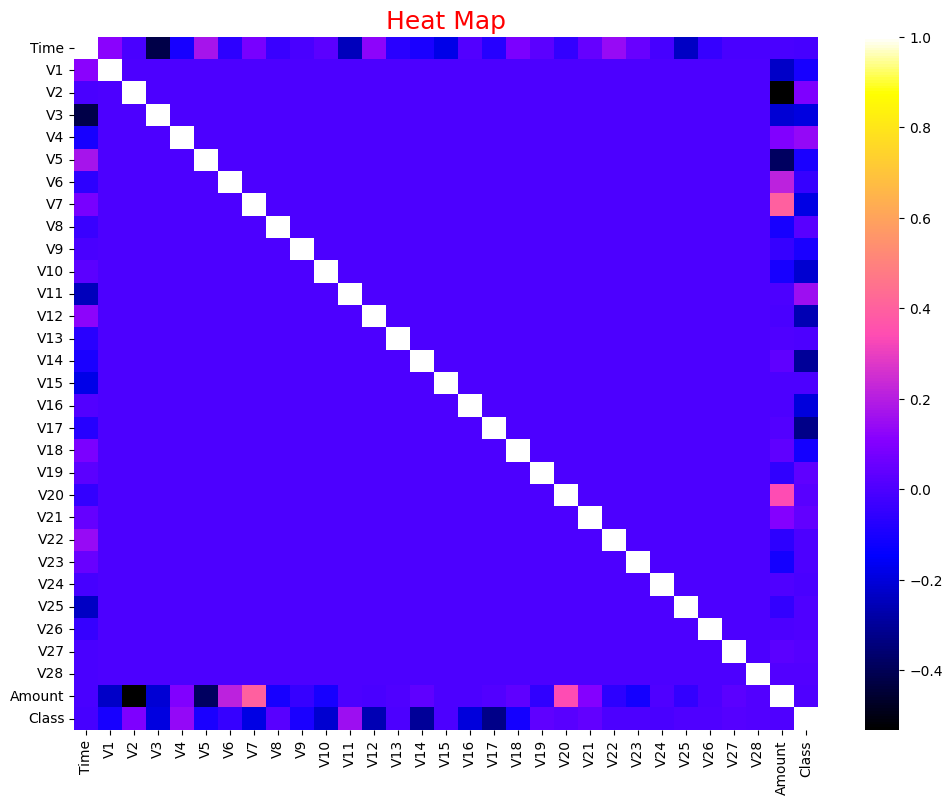

In [59]:
#heatmap describing df.corr()
cmt = dataset.corr()
fig = plt.figure(figsize = (12,9))
f = sns.heatmap(cmt , cmap = 'gnuplot2')
f.set_title("Heat Map" , size = 18 , color = 'Red')
plt.show()

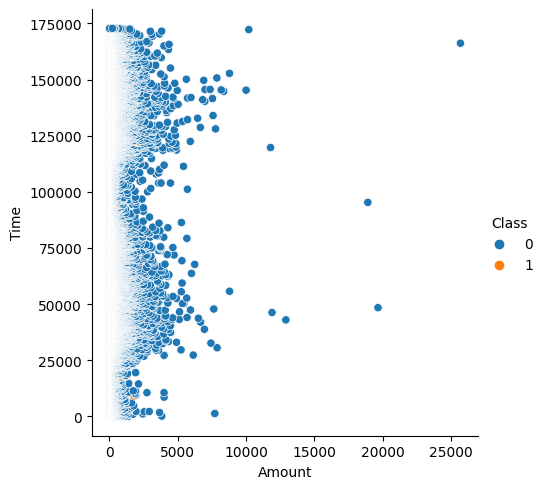

In [60]:
sns.relplot(x = 'Amount' , y = 'Time' , hue = 'Class' , data = dataset , cmap='copper' )

# **Model Training**

In [61]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size = 0.25)

In [63]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
200454,133443.0,-0.375310,0.855962,0.257790,-1.024656,1.393427,-0.665750,1.303149,-0.198846,-0.172826,...,-0.087745,-0.232507,-0.583840,-0.091899,0.602032,-0.284461,-0.805115,-0.038150,-0.037375,9.99
209922,137772.0,2.310459,-1.219629,-1.581420,-1.860852,-0.558295,-0.410743,-0.818986,-0.229431,-1.947527,...,-0.315742,0.107069,0.742799,0.026913,0.388959,0.154583,0.036316,-0.019361,-0.064261,25.00
33413,37221.0,1.177170,0.602012,-0.477907,0.750399,0.304530,-0.767118,0.270819,-0.076067,-0.525999,...,-0.063044,-0.055037,-0.077386,-0.047619,0.127017,0.458872,0.366731,-0.014234,0.032505,0.76
272838,165290.0,-0.200418,1.104757,0.335796,-0.712958,0.621050,-0.995029,1.251374,-0.488124,0.193386,...,0.209289,-0.305362,-0.455094,0.034352,0.005381,-0.456156,0.102723,0.062589,-0.065508,2.28
52744,45621.0,1.078964,0.003751,1.133196,1.219802,-0.593427,0.382384,-0.518934,0.235985,0.354157,...,-0.111319,0.191727,0.849569,-0.106488,0.281791,0.556918,-0.218675,0.080491,0.019899,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202974,134586.0,1.775643,-0.306708,-0.393083,1.211104,-0.261155,0.053434,-0.288118,0.050569,0.470340,...,-0.027526,-0.122620,-0.392472,0.263006,-0.447012,-0.383982,-0.986145,0.043678,-0.023582,83.95
227714,145189.0,1.922368,-0.707644,-2.517526,-0.833869,2.175932,3.480254,-0.551141,0.829207,0.935995,...,-0.054924,-0.135083,-0.372376,0.206778,0.718081,-0.048618,-0.073680,-0.015777,-0.052859,60.00
22927,32504.0,-7.607850,4.482418,-6.178093,1.085916,-4.540755,-1.016811,-2.452222,4.879642,-0.801434,...,0.117299,0.255381,0.173254,-0.010944,0.064430,0.040663,-0.380752,0.181898,-0.061643,89.99
47146,43101.0,-0.572136,-0.003791,2.172130,0.077441,-0.255194,0.240880,-0.296645,0.260097,0.096077,...,0.339024,-0.040371,0.036650,0.016519,0.118329,-0.548375,1.022816,0.088514,0.131816,30.00


In [64]:
#array to store the accuracy_score values of both models
scores = []

# **Comparing two models**

In [65]:
#logistic regression model
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [66]:
y_pred = np.array(lr.predict(X_test))
y = np.array(y_test)

In [67]:
print(accuracy_score(y , y_pred))
scores.append(accuracy_score(y , y_pred)*100)

0.9990028369989608


In [68]:
print(recall_score(y_test , y_pred))

0.6612903225806451


In [69]:
print(confusion_matrix(y , y_pred))

[[71049    29]
 [   42    82]]


In [70]:
print("Classification Report : ")
print(classification_report(y , y_pred))

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71078
           1       0.74      0.66      0.70       124

    accuracy                           1.00     71202
   macro avg       0.87      0.83      0.85     71202
weighted avg       1.00      1.00      1.00     71202



In [71]:
n_outliers = len(fraud)
n_errors = (y_pred != y_test).sum()
print("The model used is Logistic Regression")
acc = accuracy_score(y_test, y_pred)
print("The accuracy is {}".format(acc))
prec = precision_score(y_test, y_pred)
print("The precision is {}".format(prec))
rec = recall_score(y_test, y_pred)
print("The recall is {}".format(rec))
f1 = f1_score(y_test, y_pred)
print("The F1-Score is {}".format(f1))
MCC = matthews_corrcoef(y_test, y_pred)
print("The Matthews correlation coefficient is {}".format(MCC))

The model used is Logistic Regression
The accuracy is 0.9990028369989608
The precision is 0.7387387387387387
The recall is 0.6612903225806451
The F1-Score is 0.6978723404255319
The Matthews correlation coefficient is 0.6984475123915586


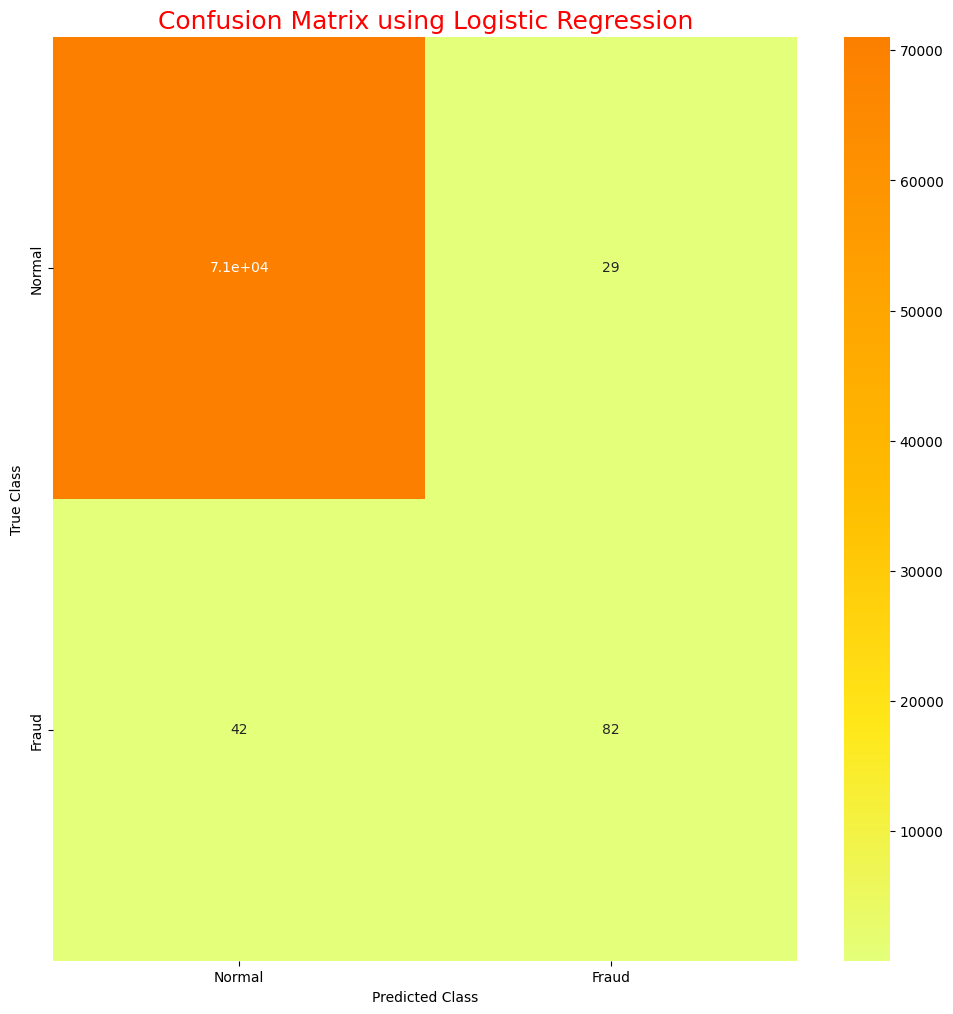

In [72]:
#confusion matrix using logistic regression
LABELS = ['Normal','Fraud']
conf_matrix = confusion_matrix(y_test , y_pred)
plt.figure(figsize = (12,12))
f = sns.heatmap(conf_matrix , xticklabels = LABELS , yticklabels = LABELS , annot=True ,cmap = 'Wistia')
f.set_title("Confusion Matrix using Logistic Regression" , color = "Red" , size = 18)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [73]:
#K-Means model
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train , y_train)

KMeans(n_clusters=2)

In [74]:
y_pred = np.array(kmeans.predict(X_test))
y = np.array(y_test)

In [75]:
print(accuracy_score(y , y_pred))
scores.append(accuracy_score(y , y_pred)*100)

0.5362630263194854


In [76]:
print(recall_score(y_test , y_pred))

0.33064516129032256


In [78]:
print(confusion_matrix(y , y_pred))

[[38142 32936]
 [   83    41]]


In [77]:
print("Classification Report : ")
print(classification_report(y , y_pred))

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.54      0.70     71078
           1       0.00      0.33      0.00       124

    accuracy                           0.54     71202
   macro avg       0.50      0.43      0.35     71202
weighted avg       1.00      0.54      0.70     71202



In [79]:
n_outliers = len(fraud)
n_errors = (y_pred != y_test).sum()
print("The model used is K-Means")
acc = accuracy_score(y_test, y_pred)
print("The accuracy is {}".format(acc))
prec = precision_score(y_test, y_pred)
print("The precision is {}".format(prec))
rec = recall_score(y_test, y_pred)
print("The recall is {}".format(rec))
f1 = f1_score(y_test, y_pred)
print("The F1-Score is {}".format(f1))
MCC = matthews_corrcoef(y_test, y_pred)
print("The Matthews correlation coefficient is {}".format(MCC))

The model used is K-Means
The accuracy is 0.5362630263194854
The precision is 0.001243290778421324
The recall is 0.33064516129032256
The F1-Score is 0.0024772665478384336
The Matthews correlation coefficient is -0.011098859606889914


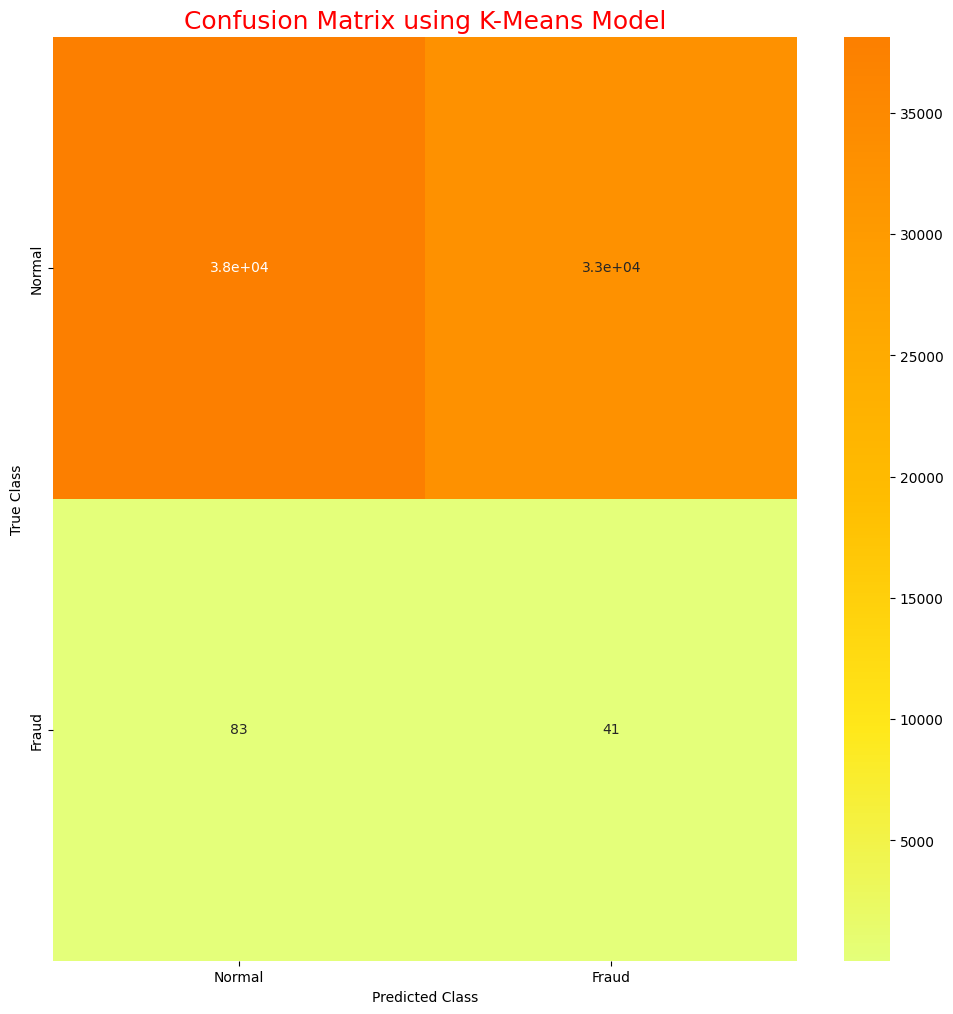

In [80]:
#confusion matrix using K-Means model
LABELS = ['Normal','Fraud']
conf_matrix = confusion_matrix(y_test , y_pred)
plt.figure(figsize = (12,12))
f = sns.heatmap(conf_matrix , xticklabels = LABELS , yticklabels = LABELS , annot=True ,cmap = 'Wistia')
f.set_title("Confusion Matrix using K-Means Model" , color = "Red" , size = 18)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [81]:
#models for comparision
results  = pd.DataFrame({
    'Models' : ['Logistic Regression' , 'K-Means'] , 'Accuracy' : scores})
results = results.sort_values(by = 'Accuracy' , ascending = False)
print(results)

                Models   Accuracy
0  Logistic Regression  99.900284
1              K-Means  53.626303


# Conclusion:
As per the accuracy , Logistic Regression model is better than K-Means model for the above dataset.